In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv('./Data/ex2data1.txt', names=['Exam 1', 'Exam 2', 'Admitted'])
df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


导入数据画散点图

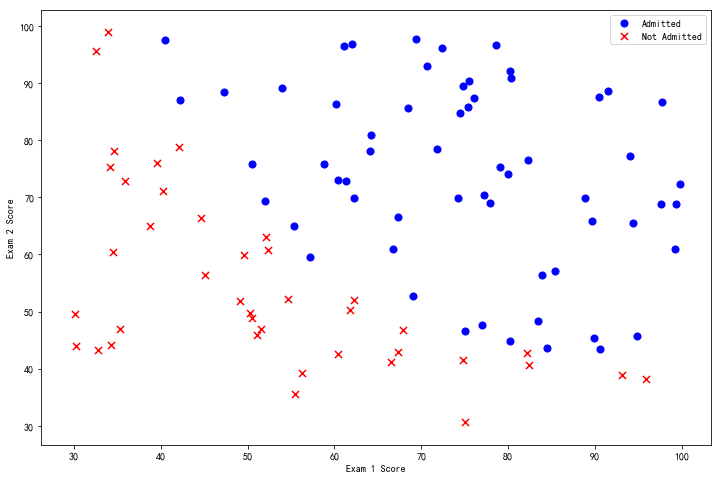

In [3]:
positive = df[df['Admitted'].isin([1])]
negative = df[df['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [4]:
# 定义假设函数（S型函数）

def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

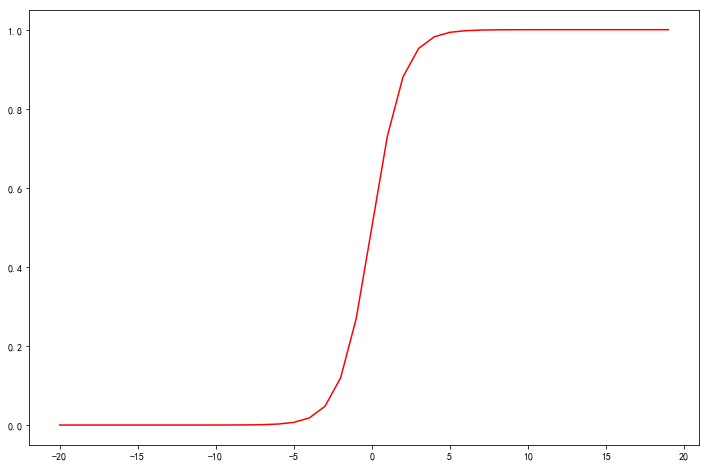

In [5]:
# 简单测试定义的假设函数

num = np.arange(-20, 20, step=1)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(num, Sigmoid(num), color='red')
plt.show()


代价函数：



In [28]:
#  定义CostFunction

def costFunc(X, y, theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    s = np.multiply(-y, np.log(Sigmoid(X * theta.T)))
    t = np.multiply((1-y), np.log(1-Sigmoid(X * theta.T)))
    return np.sum((s - t) / len(X))


In [16]:
df.insert(0, 'Ones', 1) 
df.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [18]:
df.shape

(100, 4)

In [26]:
cols = df.shape[1]
X = df.iloc[:, 0:cols-1]   # 去掉最后一列的值
y = df.iloc[:,cols-1:cols] # 打印最后一列的值

X = np.array(X.values)     # 把X的值转化为二位的数组 
# len(X)
y = np.array(y.values)
theta = np.zeros(3)        # 初始化θ值，并转化为一维的数组（一行三列）
# theta.ndim


1

In [29]:
# 计算初始化的代价函数（θ值为0）

costFunc(X, y, theta)

0.69314718055994573

使用梯度下降计算

In [44]:
def gradientDescent(theta, X, y,):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = Sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [45]:
gradientDescent(theta, X, y)


array([ -0.1       , -12.00921659, -11.26284221])

In [48]:
import scipy.optimize as opt

# help(scipy.optimize)
# 优化梯度函数哈代价函数
# opt.fmin_tnc(func=costFunc, x0=theta, fprime=gradientDescent, args=(X, y))
result = opt.fmin_tnc(func=costFunc, x0=theta, fprime=gradientDescent, args=(X, y))
result

ValueError: shapes (1,3) and (1,100) not aligned: 3 (dim 1) != 1 (dim 0)